In [63]:
! pip install pandas numpy


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
! pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

<h2>1. DATA LOADING<h2>

We will load the 2 datasets: train and store

In [67]:
df_train = pd.read_csv('train.csv')
df_train

C:\Users\Owner\AppData\Local\Temp\ipykernel_25700\3829018852.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931
...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751


In [68]:
df_store = pd.read_csv('store.csv')
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<h2>2. DATA UNDERSTANDING<h2>

In this section we will get some understanding about our data focusing on descriptive statistics and handling missing value

In [69]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931


In [70]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751
1001598,1115,2,2013-01-01,0,0,0,0,a,1,959362


In [71]:
#Check the overall info of the dataset
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001599 entries, 0 to 1001598
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1001599 non-null  int64 
 1   DayOfWeek      1001599 non-null  int64 
 2   Date           1001599 non-null  object
 3   Sales          1001599 non-null  int64 
 4   Customers      1001599 non-null  int64 
 5   Open           1001599 non-null  int64 
 6   Promo          1001599 non-null  int64 
 7   StateHoliday   1001599 non-null  object
 8   SchoolHoliday  1001599 non-null  int64 
 9   Id             1001599 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 76.4+ MB
None


In [72]:
#Check the missing values in the train dataset
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64

As we can see, the train dataset does not have any missing values. 
However, we observe that there are some days that have zero sales. We need to deal with this before conducting further analysis

In [73]:
df_train['Sales'].describe()

count    1.001599e+06
mean     5.770573e+03
std      3.852568e+03
min      0.000000e+00
25%      3.722000e+03
50%      5.741000e+03
75%      7.854000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [74]:
#Check how many percentage of sales and customers is zero
(len(df_train[df_train['Sales'] == 0])/len(df_train['Sales']))*100

17.04085167816661

In [75]:
(len(df_train[df_train['Customers'] == 0])/len(df_train['Customers']))*100

17.04065199745607

We will create a new feature: sales per customer

In [76]:
# data extraction
df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month
df_train['Day'] = pd.DatetimeIndex(df_train['Date']).day

df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,2015,7,17
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,2015,7,17
2,3,5,2015-07-17,6679,673,1,1,0,1,739744,2015,7,17
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001,2015,7,17
4,5,5,2015-07-17,4355,513,1,1,0,1,981931,2015,7,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066,2013,1,1
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592,2013,1,1
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205,2013,1,1
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751,2013,1,1


In [77]:
df_train['Sales Per Customer'] = df_train['Sales']/df_train['Customers']
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day,Sales Per Customer
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,2015,7,17,9.348748
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,2015,7,17,9.127273
2,3,5,2015-07-17,6679,673,1,1,0,1,739744,2015,7,17,9.924220
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001,2015,7,17,7.828742
4,5,5,2015-07-17,4355,513,1,1,0,1,981931,2015,7,17,8.489279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066,2013,1,1,NaN
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592,2013,1,1,NaN
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205,2013,1,1,NaN
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751,2013,1,1,NaN


We can check the distribution of Sales, Customers, and Sales Per Customer through EDCF

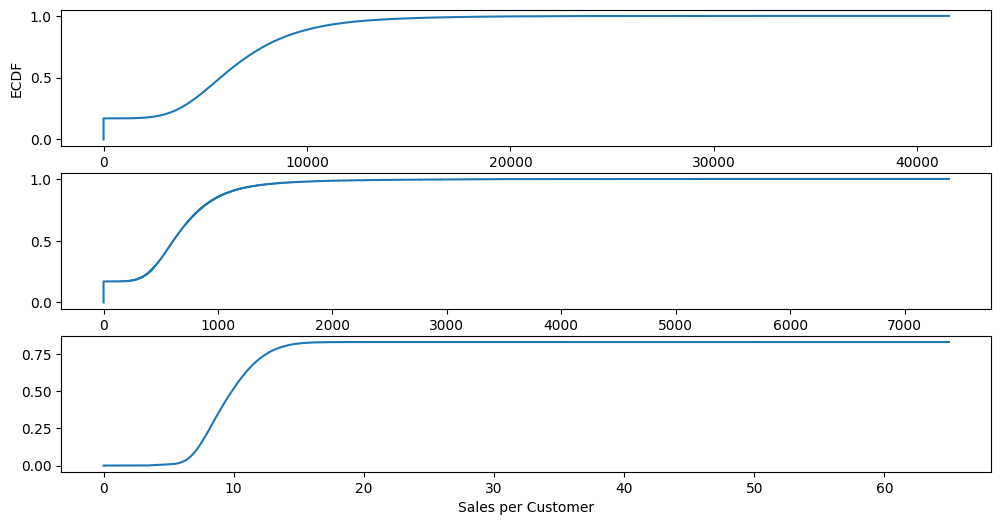

In [78]:
#sns.set_theme(style = "ticks")
plt.figure(figsize = (12, 6))

plt.subplot(311)
CDF = ECDF(df_train['Sales'])
plt.plot(CDF.x, CDF.y);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(df_train['Customers'])
plt.plot(cdf.x, cdf.y);
plt.xlabel('Customers');

# plot third ECDF  
plt.subplot(313)
cdf = ECDF(df_train['Sales Per Customer'])
plt.plot(cdf.x, cdf.y);
plt.xlabel('Sales per Customer');


As we can see, nearly 20% of Sales and Customers are zero

In [79]:
#Check the zero sales and zero customers rows
df_train[(df_train['Sales'] == 0) & (df_train['Open']==0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day,Sales Per Customer
291,292,5,2015-07-17,0,0,0,1,0,1,662351,2015,7,17,NaN
875,876,5,2015-07-17,0,0,0,1,0,1,287465,2015,7,17,NaN
908,909,5,2015-07-17,0,0,0,1,0,0,7457,2015,7,17,NaN
1406,292,4,2015-07-16,0,0,0,1,0,1,885992,2015,7,16,NaN
1990,876,4,2015-07-16,0,0,0,1,0,1,179782,2015,7,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066,2013,1,1,NaN
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592,2013,1,1,NaN
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205,2013,1,1,NaN
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751,2013,1,1,NaN


In [80]:
df_train[(df_train['Sales'] == 0) & (df_train['Open']!=0)].shape

(54, 14)

We will drop 170627 rows that Store is not opened and has zero sales so that we can focus on predicting sales for the open ones.

In [81]:
df_train = df_train[(df_train["Open"] != 0) & (df_train['Sales'] != 0)]
df_train.shape


(830918, 14)

Now we will take a look at store descriptions

In [82]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [83]:
#Check the info of the dataset
print(df_store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


In [84]:
#Check the missing value of store dataset
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

- Có 3 cửa hàng không có Competition Distance, sẽ có 3 khả năng như sau: 
    + 3 cửa hàng này không có đối thủ lân cận
    + Lỗi lúc nhập liệu
    + Có thể có competitors nhưng vì khoảng cách quá xa nên được cho là irrelevant --> không bỏ vào dataset
- Cách xử lý: Có 2 cách xử lý như sau: 
    + Thay thế 3 null values bằng overall mean
    + Impute based on AssortmentType or StoreType

In [85]:
#Check again the statistical info of Competition Distance variable
print(df_store['CompetitionDistance'].describe())

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64


In [86]:
#Check the median value of CompetitionDistance
print(f"The median of Competition Distance is {df_store.CompetitionDistance.median()}")

The median of Competition Distance is 2325.0


Because Competition Distance's mean is higher than its median, the data is right skewed (or positively skewed)

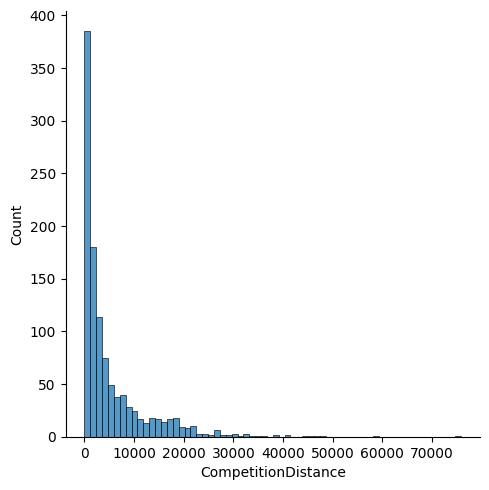

In [87]:
#Check the distribution shape of Competition Distance to see the skewness
sns.displot(data=df_store, x=df_store['CompetitionDistance'])

In [88]:
#Check the competition distance null rows to see if there is any specialties within them
CompetitionDistance_null_rows = df_store[df_store['CompetitionDistance'].isnull()]
CompetitionDistance_null_rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


We see no speical patterns so it's logical to impute NaN value by median

In [89]:
#Check the CompetitionDistance mean based on StoreType
median_by_store_type = df_store.groupby(['StoreType'])['CompetitionDistance'].median()
print("Median Competition Distance by Store Type:\n", median_by_store_type)

Median Competition Distance by Store Type:
 StoreType
a    1790.0
b     900.0
c    1660.0
d    5040.0
Name: CompetitionDistance, dtype: float64


In [90]:
#Check the CompetitionDistance mean based on AssortmentType
median_by_assortment = df_store.groupby('Assortment')['CompetitionDistance'].mean()
print('Median Competition Distance by Assortment Type:\n', median_by_assortment)

Median Competition Distance by Assortment Type:
 Assortment
a    4400.338409
b    1177.777778
c    6638.769531
Name: CompetitionDistance, dtype: float64


In [91]:
#Replace null value with the median value because its 2 times lower than the mean value
val = df_store['CompetitionDistance'].median()
df_store['CompetitionDistance'].fillna(val, inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_25700\4094828010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['CompetitionDistance'].fillna(val, inplace=True)


In [92]:
#Check again the number of null values of CompetitionDistance variable
df_store['CompetitionDistance'].isnull().sum()

0

Now we will move on to processing the missing value for Competition Open time and Promo2 time

In [93]:
#Check again null values of df_store dataset
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [94]:
#Check the alignments between these 2 columns
c_ = df_store[(df_store['CompetitionOpenSinceMonth'].isnull()) & (df_store['CompetitionOpenSinceYear'].notnull())]
c_

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


It means that 354 missing values in the CompetitionOpenSinceMonth column and 354 missing values in the CompetitionOpenSinceYear column are for the same stores

In [95]:
#Check xem các missing value của 2 cột này có gì đặc biệt không
competitor_open_month_null_rows = df_store[df_store['CompetitionOpenSinceMonth'].isnull()]
print(competitor_open_month_null_rows)

      Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN        

In [96]:
_ = df_store[pd.isnull(df_store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape
#no promo time means no promo2 happened

(0, 10)

Therefore, we can replace all the NaN value in the Promo2 time and Competition Open Time by 0

In [97]:
#Replacing NaN with 0
df_store.replace(np.nan, 0, inplace=True)

In [98]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


All the null value is gone, now we will move onto EDA

<h2>EDA & VISUALIZATION<h2>

In [99]:
df_train.shape

(830918, 14)

In [100]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


Merge the 2 datasets for more information

In [101]:
#Join 2 datasets together
train_store = pd.merge(df_train, df_store, how='inner', on='Store')
train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,...,Sales Per Customer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,...,9.348748,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,...,9.127273,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-17,6679,673,1,1,0,1,739744,...,9.924220,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001,...,7.828742,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-17,4355,513,1,1,0,1,981931,...,8.489279,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830913,682,2,2013-01-01,3375,566,1,0,a,1,456248,...,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
830914,733,2,2013-01-01,10765,2377,1,0,a,1,399778,...,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
830915,769,2,2013-01-01,5035,1248,1,0,a,1,725271,...,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
830916,948,2,2013-01-01,4491,1039,1,0,a,1,776356,...,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


We will generate heatmap to see the correlation between Sales (target variable) and other predictive variables

In [102]:
corr_matrix = train_store.drop('Open', axis=1).corr(numeric_only = True)
corr_matrix

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Id,Year,Month,Day,Sales Per Customer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.000338,0.007795,0.034043,-0.000012,0.000269,-0.000561,0.000337,0.001390,-0.000108,-0.048503,-0.027023,-0.032606,-0.008206,0.007768,0.010903,0.007800
DayOfWeek,0.000338,1.000000,-0.179012,-0.097433,-0.289864,-0.136660,0.000218,0.002208,-0.019875,0.008762,-0.094994,0.005478,-0.000839,-0.001310,-0.003231,-0.002709,-0.003228
Sales,0.007795,-0.179012,1.000000,0.824032,0.367238,0.036267,0.000839,0.037083,0.074202,-0.055358,0.185822,-0.036795,-0.018045,0.005683,-0.127948,-0.058918,-0.127973
Customers,0.034043,-0.097433,0.824032,1.000000,0.182686,0.023948,0.000955,0.001496,0.054812,-0.035504,-0.323843,-0.148657,-0.020731,0.002003,-0.202298,-0.130956,-0.202271
Promo,-0.000012,-0.289864,0.367238,0.182686,1.000000,0.023735,-0.000097,0.026222,-0.006109,-0.134198,0.279252,-0.002371,0.000719,0.000995,-0.000325,-0.000806,-0.000326
SchoolHoliday,0.000269,-0.136660,0.036267,0.023948,0.023735,1.000000,0.001187,-0.065699,0.115312,0.018685,0.011783,-0.005008,-0.000921,-0.000959,-0.003994,-0.003870,-0.003996
Id,-0.000561,0.000218,0.000839,0.000955,-0.000097,0.001187,1.000000,0.000134,-0.000737,0.001527,-0.000888,0.000226,0.000747,0.000583,-0.001337,-0.003029,-0.001337
Year,0.000337,0.002208,0.037083,0.001496,0.026222,-0.065699,0.000134,1.000000,-0.282737,-0.017224,0.069366,0.000739,-0.000580,-0.000167,-0.006466,-0.007842,-0.006467
Month,0.001390,-0.019875,0.074202,0.054812,-0.006109,0.115312,-0.000737,-0.282737,1.000000,-0.012523,0.014266,0.003937,-0.001368,-0.000774,-0.026180,-0.032185,-0.026185
Day,-0.000108,0.008762,-0.055358,-0.035504,-0.134198,0.018685,0.001527,-0.017224,-0.012523,1.000000,-0.031683,-0.000149,-0.000218,-0.000324,0.000950,0.000957,0.000950


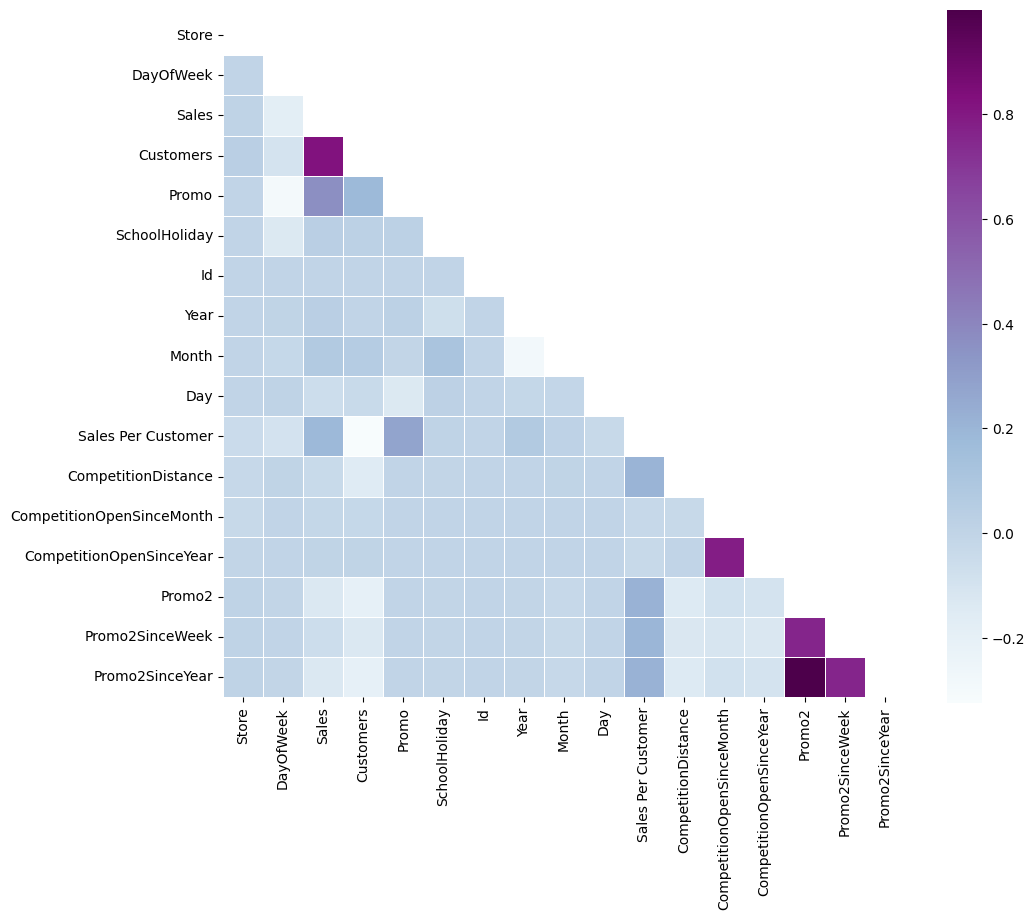

In [103]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

We can see that there is a high correlation between Sales and number of Customers.
Promo is also a variable that has positive impact on Sales
Promo2 even has negative impacts on Sales

We will start looking closely at each variable and its impact on Sales

In [106]:
train_store['Month'].dtype

dtype('int32')

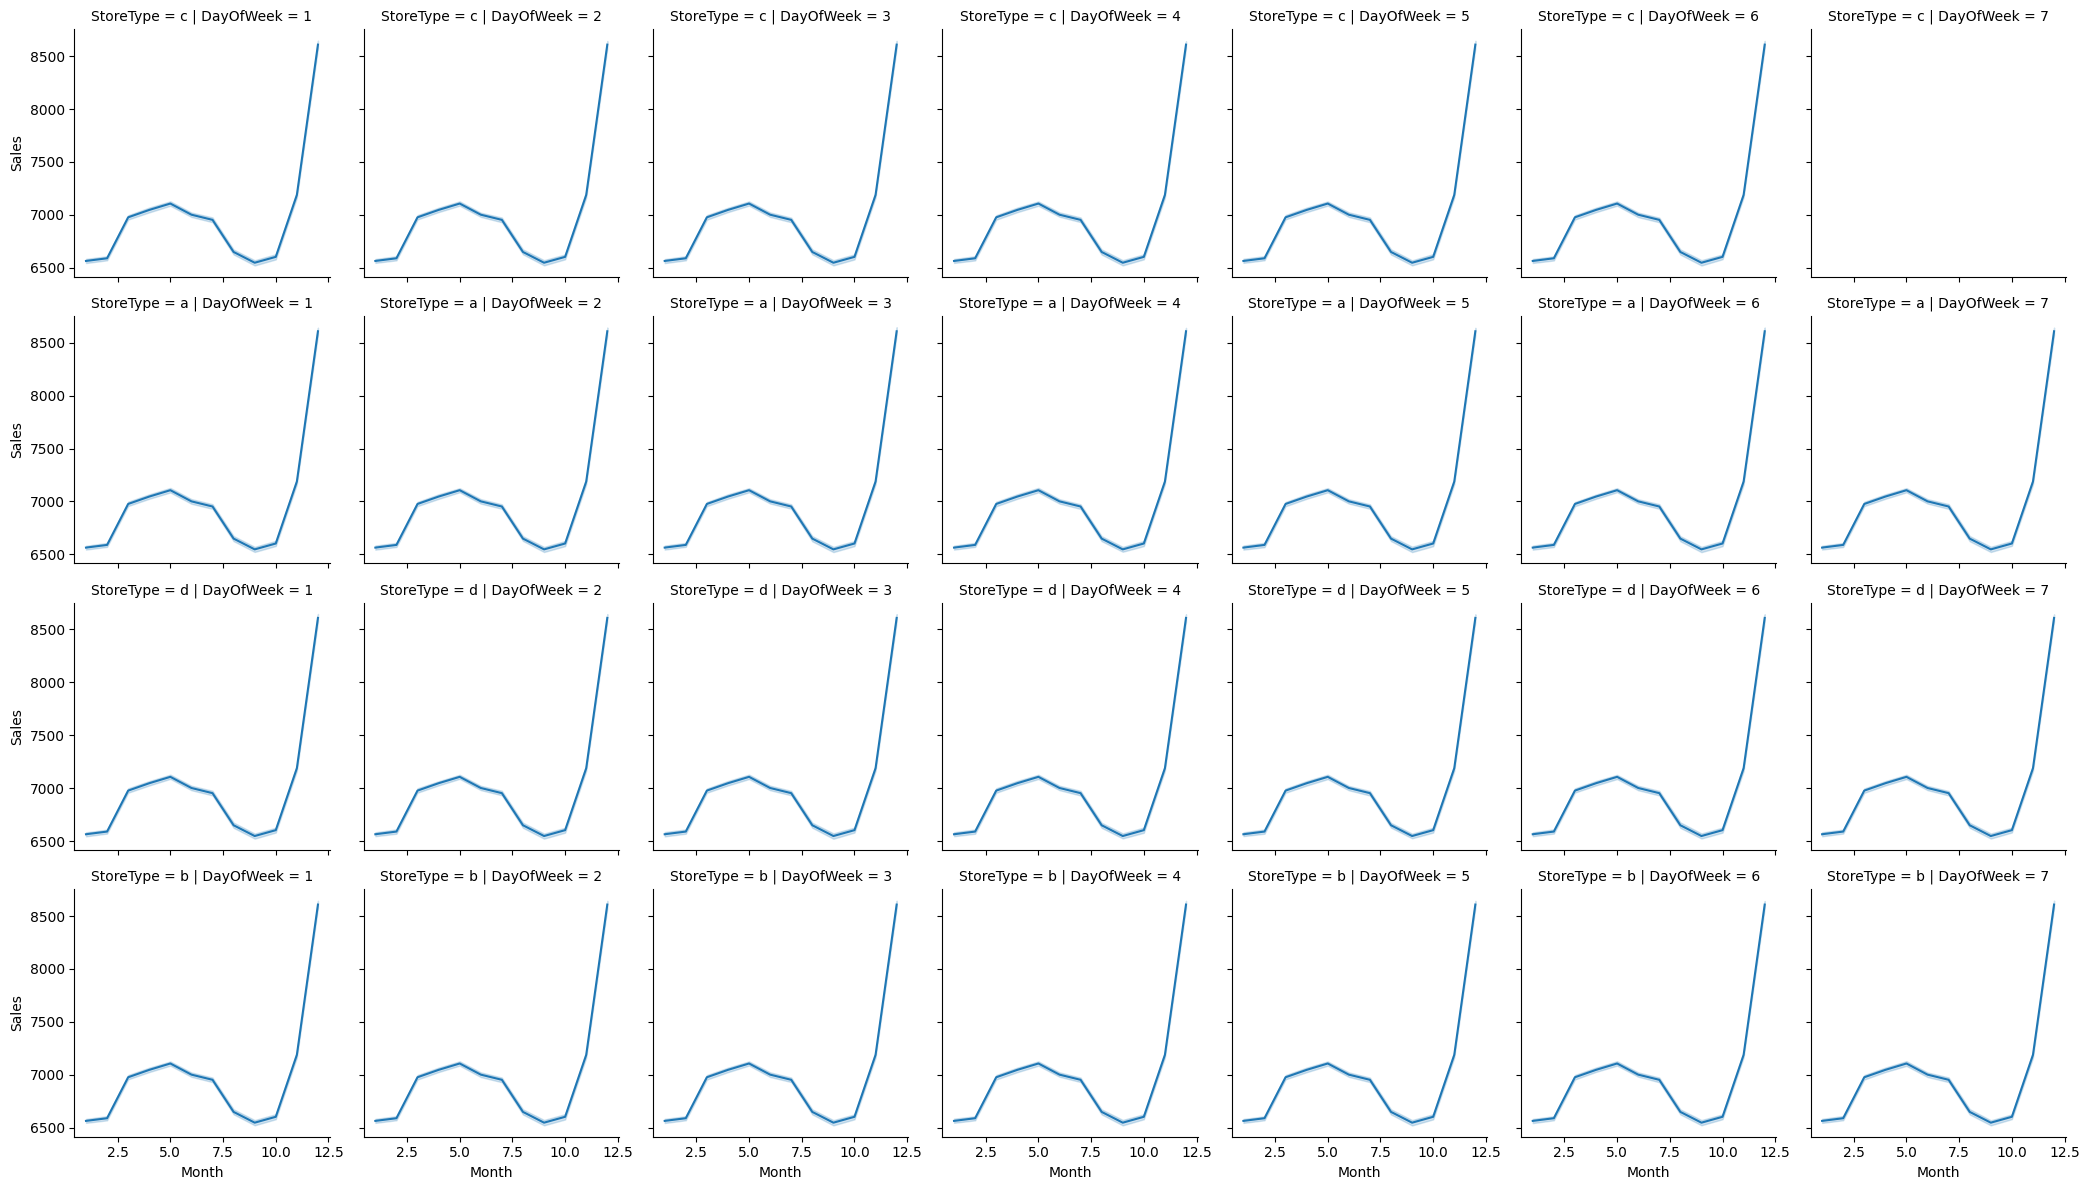

In [107]:
#The relationship between DayOfWeek and Sales
g = sns.FacetGrid(train_store, col='DayOfWeek', row='StoreType')
g.map(sns.lineplot, x=train_store['Month'], y=train_store['Sales'])